<a href="https://colab.research.google.com/github/caroalvarezf/Trabajo-Especiliazacion/blob/master/01_PREPARACION_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/caroalvarezf/Trabajo-Especiliazacion/master/init.py
import init; init.init(force_download=False) 

In [197]:
#Instalación
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz 
!tar xf spark-3.0.1-bin-hadoop3.2.tgz 
!pip install -q findspark

#Variables de Entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

#SparkContext
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

#SQL Context
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.types import *
sqlCtx = SQLContext(sc)

In [328]:
import pandas as pd
datos1=pd.read_csv("local/DATA_DEMO.csv", sep=";")
datos2=sqlCtx.createDataFrame(datos1)
type(datos2)

pyspark.sql.dataframe.DataFrame

In [329]:
datos2.show(5)

+--------------+--------------+--------+---------+------------+----+-------------------+--------------+---------+---------+---------+
|CODIGO_CLIENTE|FECHA_CONTACTO|   CANAL|COD_CANAL|COD_SERVICIO|sexo|Fecha de nacimiento|      segmento|producto1|producto2|producto3|
+--------------+--------------+--------+---------+------------+----+-------------------+--------------+---------+---------+---------+
|             1|    19/10/2019|OFICINAS|        1|           5|   m|          8/01/1974|rentas masivas|       si|       si|       no|
|             1|     3/06/2020|OFICINAS|        1|           5|   m|          8/01/1974|rentas masivas|       si|       si|       no|
|             1|     2/04/2019|OFICINAS|        1|           5|   m|          8/01/1974|rentas masivas|       si|       si|       no|
|             1|    24/04/2019|OFICINAS|        1|           5|   m|          8/01/1974|rentas masivas|       si|       si|       no|
|             1|     1/04/2020|OFICINAS|        1|           5

In [330]:
!git init

Reinitialized existing Git repository in /content/.git/


In [331]:
#Calculo de la edad
from datetime import datetime

datosRDD = datos2.rdd
fecha_n = datosRDD.map(lambda x: datetime.strptime(x['Fecha de nacimiento'], '%d/%m/%Y'))

hoy = datetime.now()
edad = fecha_n.map(lambda x: hoy.year - x.year if hoy.month < x.month else hoy.year -x.year - 1)
edad = edad.toDF('INT')
edad.show(3)

+-----+
|value|
+-----+
|   45|
|   45|
|   45|
+-----+
only showing top 3 rows



In [332]:
datos3 = datos2.join(edad)

In [333]:
datos3 = datos3.select(datos3.CODIGO_CLIENTE, datos3.FECHA_CONTACTO, datos3.CANAL, datos3.COD_CANAL, datos3.COD_SERVICIO,
                       datos3.sexo, datos3.segmento, datos3.producto1, datos3.producto2, datos3.producto3, datos3.value.alias("Edad"))
datos3.show()

+--------------+--------------+--------+---------+------------+----+--------------+---------+---------+---------+----+
|CODIGO_CLIENTE|FECHA_CONTACTO|   CANAL|COD_CANAL|COD_SERVICIO|sexo|      segmento|producto1|producto2|producto3|Edad|
+--------------+--------------+--------+---------+------------+----+--------------+---------+---------+---------+----+
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        

# ***ANALISIS VARIABLES CATEGORICAS***

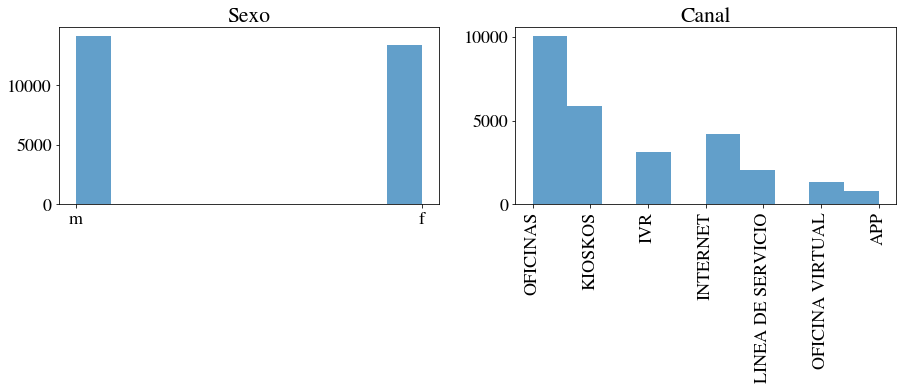

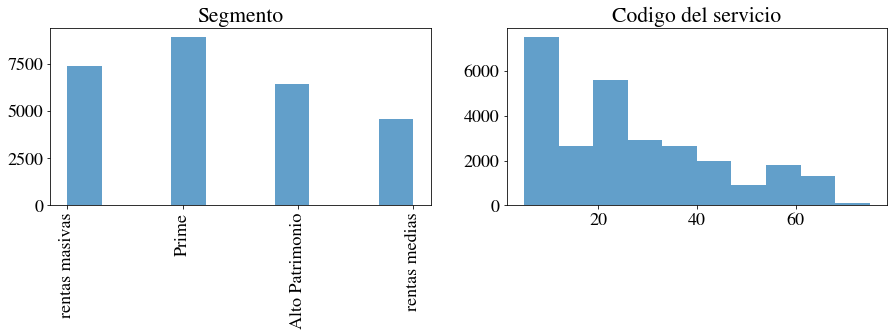

In [201]:
#BD sin eliminar datos atipicos

import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
pyplot.hist(datos1['sexo'], alpha=0.7) 
pyplot.title('Sexo')

ax = fig.add_subplot(4, 2, 2)
pyplot.hist(datos["CANAL"], alpha=0.7) 
pyplot.title('Canal')
pyplot.xticks(rotation=90)

pyplot.show()

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
pyplot.hist(datos["segmento"], alpha=0.7) 
pyplot.title('Segmento')
pyplot.xticks(rotation=90)

ax = fig.add_subplot(4, 2, 2)
pyplot.hist(datos["COD_SERVICIO"], alpha=0.7) 
pyplot.title('Codigo del servicio')


pyplot.show()


In [ ]:
import numpy as np

a = datos1['CANAL'].value_counts(normalize = False)
m = datos1.shape[0]
print("Muestras por cada categoría para la vairble Canal = \n")
print(a)
print("Número de datos =",m)
media_nominal = a/m
varianza_nominal = media_nominal*(1 - media_nominal)
desd_nominal = np.sqrt(varianza_nominal)
print("\n")
print("Media nominal = \n",media_nominal)
print("\n")
print("Varianza nominal = \n",varianza_nominal)
print("\n")
print("Desviación nominal = \n",desd_nominal)

Muestras por cada categoría para la vairble Canal = 

OFICINAS             10061
KIOSKOS               5855
INTERNET              4226
IVR                   3114
LINEA DE SERVICIO     2048
OFICINA VIRTUAL       1343
APP                    772
Name: CANAL, dtype: int64
Número de datos = 27419


Media nominal = 
 OFICINAS             0.366935
KIOSKOS              0.213538
INTERNET             0.154127
IVR                  0.113571
LINEA DE SERVICIO    0.074693
OFICINA VIRTUAL      0.048981
APP                  0.028156
Name: CANAL, dtype: float64


Varianza nominal = 
 OFICINAS             0.232294
KIOSKOS              0.167940
INTERNET             0.130372
IVR                  0.100673
LINEA DE SERVICIO    0.069114
OFICINA VIRTUAL      0.046582
APP                  0.027363
Name: CANAL, dtype: float64


Desviación nominal = 
 OFICINAS             0.481969
KIOSKOS              0.409804
INTERNET             0.361070
IVR                  0.317289
LINEA DE SERVICIO    0.262895
OFICINA VIRTU

In [ ]:
import numpy as np

a = datos1['sexo'].value_counts(normalize = False)
m = datos1.shape[0]
print("Muestras por cada categoría para la vairble sexo = \n")
print(a)
print("Número de datos =",m)
media_nominal = a/m
varianza_nominal = media_nominal*(1 - media_nominal)
desd_nominal = np.sqrt(varianza_nominal)
print("\n")
print("Media nominal = \n",media_nominal)
print("\n")
print("Varianza nominal = \n",varianza_nominal)
print("\n")
print("Desviación nominal = \n",desd_nominal)

Muestras por cada categoría para la vairble sexo = 

m    14106
f    13313
Name: sexo, dtype: int64
Número de datos = 27419


Media nominal = 
 m    0.514461
f    0.485539
Name: sexo, dtype: float64


Varianza nominal = 
 m    0.249791
f    0.249791
Name: sexo, dtype: float64


Desviación nominal = 
 m    0.499791
f    0.499791
Name: sexo, dtype: float64


In [ ]:
import numpy as np

a = datos1['segmento'].value_counts(normalize = False)
m = datos1.shape[0]
print("Muestras por cada categoría para la vairble Canal = \n")
print(a)
print("Número de datos =",m)
media_nominal = a/m
varianza_nominal = media_nominal*(1 - media_nominal)
desd_nominal = np.sqrt(varianza_nominal)
print("\n")
print("Media nominal = \n",media_nominal)
print("\n")
print("Varianza nominal = \n",varianza_nominal)
print("\n")
print("Desviación nominal = \n",desd_nominal)

Muestras por cada categoría para la vairble Canal = 

Prime              8955
rentas masivas     7404
Alto Patrimonio    6466
rentas medias      4594
Name: segmento, dtype: int64
Número de datos = 27419


Media nominal = 
 Prime              0.326598
rentas masivas     0.270032
Alto Patrimonio    0.235822
rentas medias      0.167548
Name: segmento, dtype: float64


Varianza nominal = 
 Prime              0.219932
rentas masivas     0.197115
Alto Patrimonio    0.180210
rentas medias      0.139476
Name: segmento, dtype: float64


Desviación nominal = 
 Prime              0.468969
rentas masivas     0.443976
Alto Patrimonio    0.424511
rentas medias      0.373464
Name: segmento, dtype: float64
